<b>
<p>
<center>
<font size='5'>
State Farm Distracted Driver Detection
</font>
</center>
</p>

<p>
<center>
<font size='4'>
Machine Learning Final Project
</font>
</center>
</p>
    
<p>
<center>
<font size='4'>
Team 10 : Keerthana Aravindhan, Tulasi Thotakura
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size='3'>
DATS_6202_11
</font>
</center>
</p>



# Introduction

Road safety problems in developing countries is a major concern and human behavior is ascribed as one of the main causes and accelerators of road safety problems.

Driver distraction has been identified as the main reason for accidents.

According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year.

State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard cameras can automatically detect drivers engaging in distracted behaviors.

https://www.kaggle.com/competitions/state-farm-distracted-driver-detection/overview

This project predicts the distracted behavior of the drivers in each images from the dashboard camera

# DataSet

Dataset of 2D dashboard camera images, each taken in car with a driver doing something

The 10 classes to predict are:

* c0: safe driving
* c1: texting - right
* c2: talking on the phone - right
* c3: texting - left
* c4: talking on the phone - left
* c5: operating the radio
* c6: drinking
* c7: reaching behind
* c8: hair and makeup
* c9: talking to passenger

The training set has ~22.4k labeled samples and 79.7k unlabeled test samples

## Import library

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/ColabNotebooks/ML/Project/

/content/drive/My Drive/ColabNotebooks/ML/Project


In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# installs
#py -m pip install --upgrade nbformat
#py -m pip install opencv-python-headless

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
# The magic below allows us to use tensorflow version 2.x
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
import pandas as pd
np.random.seed(random_seed)

In [ ]:
import os
import random
import PIL.Image
from IPython.display import display, Image
import seaborn as sns
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras import backend as K
from keras.layers import BatchNormalization, Dense
from keras.metrics import categorical_crossentropy
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
#from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import LearningRateScheduler

In [ ]:
## Check if system is using GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10549346219368704901
xla_global_id: -1
]


# Scratch CNN with Leakage

Building a CNN from scratch and training it with randomly splitted train and validation set.

## Data Preprocessing

### Loading Data

In [ ]:
# getting the current folder path
abspath_curr = os.getcwd()
driver_imgs_list = pd.read_csv('./driver_imgs_list.csv',header=0)

This code snippet fetches the current folder path and then reads a CSV file named 'driver_imgs_list.csv' into a Pandas DataFrame named driver_imgs_list.

In [ ]:
# print the driver_imgs_list details
driver_imgs_list.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
# Loading the train data and label from the folders.
train_image = []
image_label = []


for i in range(10):
    print('now we are in the folder C',i)
    directory_path = os.path.join(abspath_curr, "imgs", "train", "c" + str(i))
    files = os.listdir(directory_path)
    for file_name in files:
        img_name = os.path.join(directory_path, file_name)
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        label = i
        train_image.append([img,label])
        image_label.append(i)

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


This code loads training images and labels from folders labeled 'C0' to 'C9'. It iterates over each folder, reads images, preprocesses them, and appends them to lists train_image and image_label, respectively.

In [ ]:
# Get the number of classes
n_classes = 10

### Data Analysis

Creating json for the classes in target

In [ ]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

This code snippet defines two structures: 'classes', a list of class labels ('c0' to 'c9'), and 'class_def', a dictionary mapping each label to a behavior description.

Displaying sample image

Train image

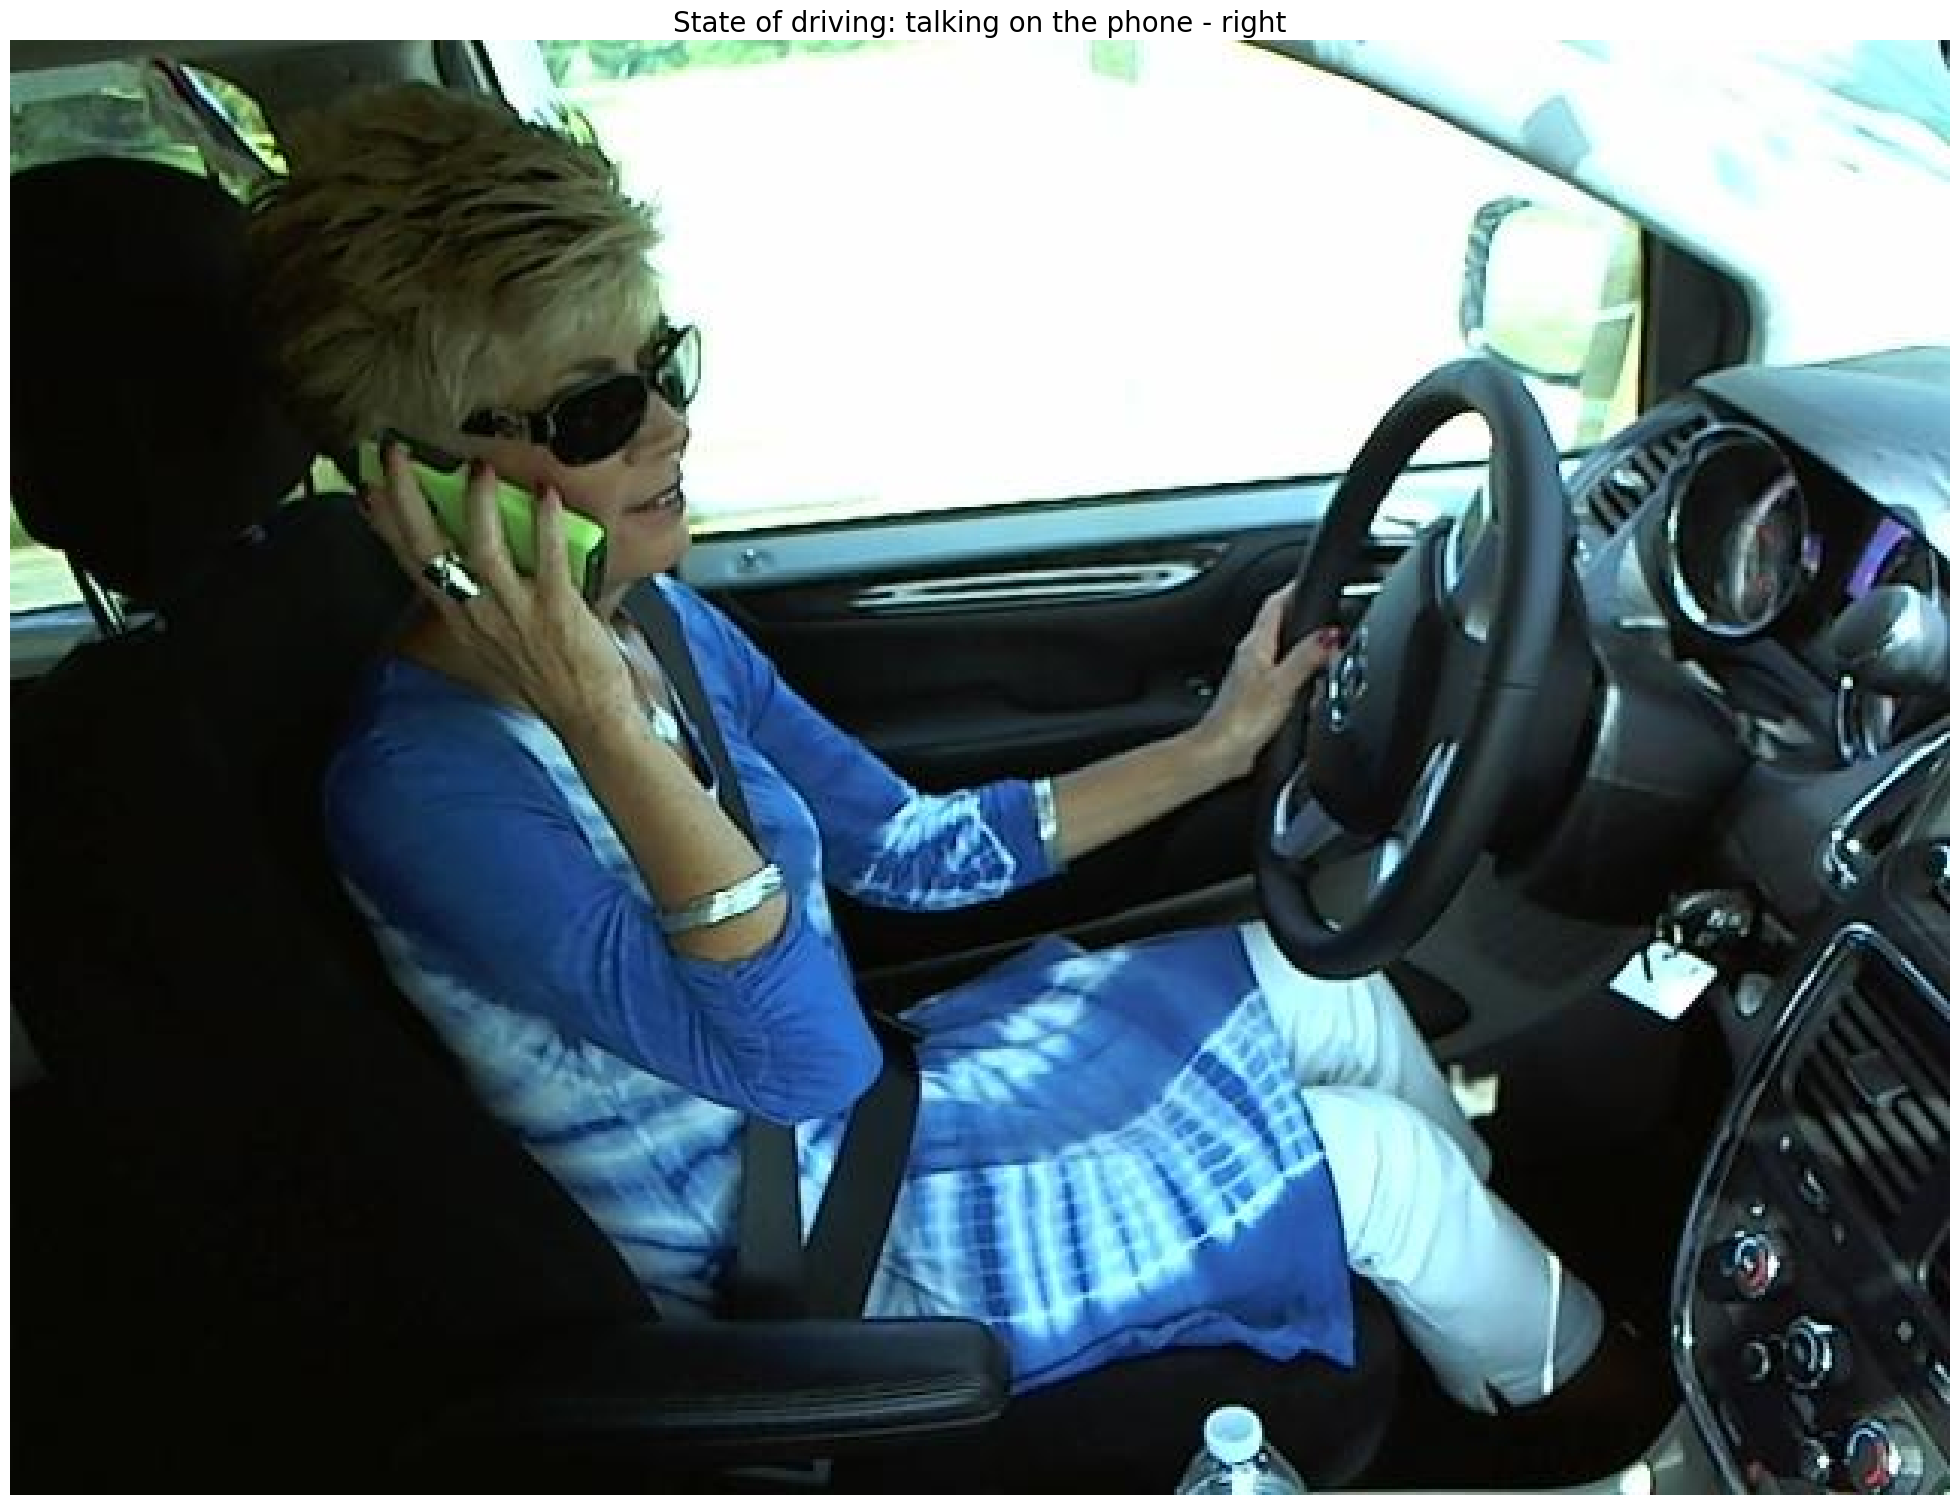

In [ ]:
from PIL import Image

fig = plt.figure(figsize=(20, 18))
train_imgs = os.path.join(abspath_curr, "imgs", "train")
pic_idx = random.randint(0, driver_imgs_list.shape[0])
im = Image.open(os.path.join(train_imgs,
                    str(driver_imgs_list.loc[pic_idx, 'classname']) +'/'
                    +str(driver_imgs_list.loc[pic_idx, 'img' ])))
plt.imshow(im)
plt.title('State of driving: ' + class_def[(driver_imgs_list.loc[pic_idx, 'classname'])])
plt.axis('off')
plt.tight_layout()
plt.show()

This code randomly selects an image from the training dataset and displays it, with the title indicating the driving state.

Test image

In [ ]:
fig = plt.figure(figsize=(20, 18))
test_imgs = os.path.join(abspath_curr, "imgs", "test")
im = Image.open(os.path.join(test_imgs, 'img_1.jpg'))
plt.imshow(im)
plt.tight_layout()
plt.show()

This code creates a figure with a specific size, opens and displays an image from the test dataset using PIL, and then shows the image using Matplotlib.

In [ ]:
# getting sizze of each image
im = Image.open("./imgs/train/c7/img_100702.jpg")
w, h = im.size
print(w, h)

640 480


This code snippet opens an image file and retrieves its dimensions using the Image.open() function from PIL. It then prints the width and height of the image.

Size of the image = 640, 480

Total number of training data : 21434


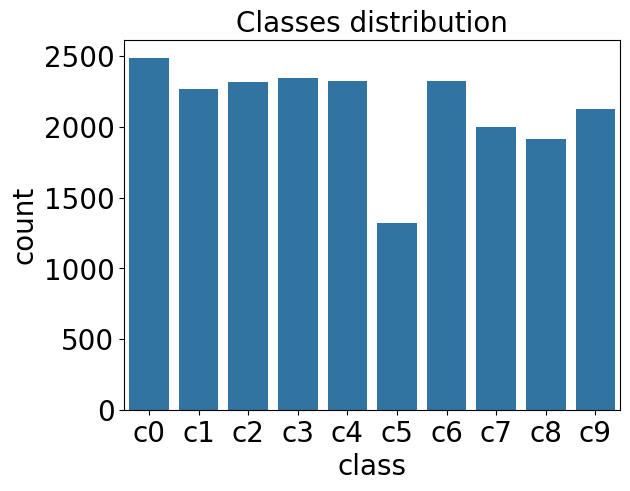

In [ ]:
# Dispalying the classes distribution of the train dataset
d = {"img" : [], "class" : []}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(train_imgs,c)) if not img.startswith(".")]
    for img in imgs:
        d["img"].append(img)
        d["class"].append(c)
df = pd.DataFrame(d)
ax = sns.countplot(data=df,x="class")
ax.set(title="Classes distribution")
print("Total number of training data :",len(df))

In [ ]:
## Randomly shuffling the images
random.shuffle(train_image)

In [ ]:
## Splitting the image and label to two different lists

X = []
Y = []
for features,labels in train_image:
    X.append(features)
    Y.append(labels)

print (len(X), len(Y))

21434 21434


This code snippet splits the image and label pairs stored in the train_image list into two separate lists X and Y. It iterates over each pair, appending the image to the X list and the corresponding label to the Y list. Finally, it prints the lengths of both lists to verify the split.







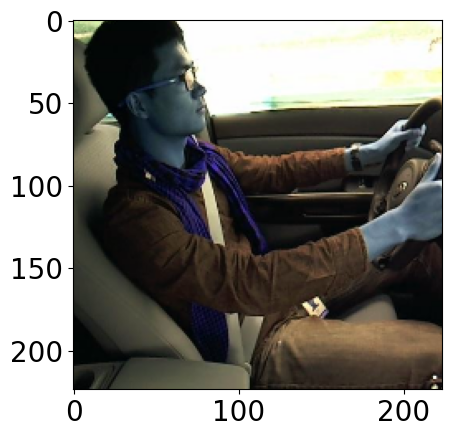

0


In [ ]:
# randomly viewly a image
plt.imshow(X[5])
plt.show()
print(Y[5])

### Encoding target and resize image

In [ ]:
## Converting images to nparray. Encoding the Y
X = np.array(X).reshape(-1,224,224,3)
Y = to_categorical(Y)

print (X.shape)

(21434, 224, 224, 3)


The images are resized to a square images i.e. 224 x 224 pixels.

### Splitting training and validation

Splitting training 80% and validation 20%

In [ ]:
## splitting the dataset randomly
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=42, test_size=0.2)

## Training

### Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Building the architecture of the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                        

This code builds a convolutional neural network (CNN) model using Keras. It consists of multiple convolutional layers with batch normalization and max-pooling, followed by fully connected layers for classification. 

### Compiling the model

In [ ]:
# Compile the model
sgd = SGD(learning_rate=0.001)
model.compile(optimizer= sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
561/561 ━━━━━━━━━━━━━━━━━━━━ 1468s 3s/step - accuracy: 0.7861 - loss: 0.7510 - val_accuracy: 0.9911 - val_loss: 0.0438
Epoch 2/3
561/561 ━━━━━━━━━━━━━━━━━━━━ 1320s 2s/step - accuracy: 0.9998 - loss: 0.0075 - val_accuracy: 0.9938 - val_loss: 0.0234
Epoch 3/3
561/561 ━━━━━━━━━━━━━━━━━━━━ 1483s 3s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9938 - val_loss: 0.0219


## Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

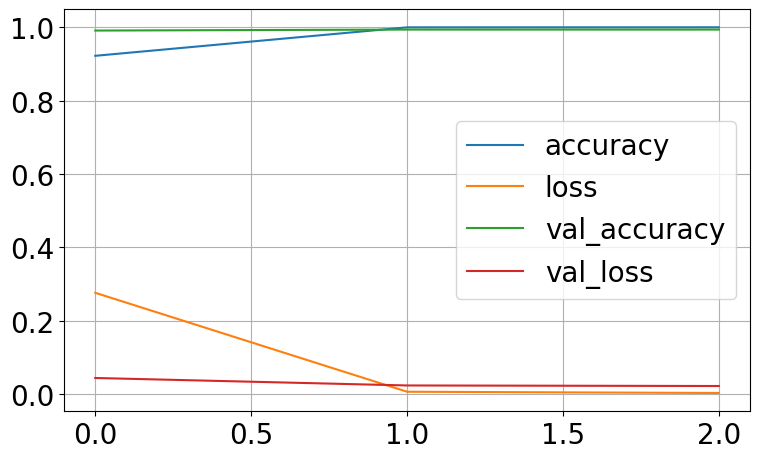

In [ ]:

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_Scratch_leakage.pdf')
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

141/141 ━━━━━━━━━━━━━━━━━━━━ 55s 388ms/step
Confusion Matrix:
[[511   0   0   0   0   0   1   0   0   0]
 [  1 450   0   0   0   0   0   0   0   0]
 [  1   0 474   0   0   0   1   0   0   0]
 [  0   0   0 460   1   0   0   0   0   0]
 [  0   0   0   1 464   0   0   0   1   0]
 [  1   0   0   0   1 455   0   0   0   1]
 [  0   0   0   0   0   0 429   1   0   0]
 [  0   0   0   1   0   0   2 412   0   1]
 [  0   0   0   0   0   0   0   2 384   3]
 [  1   1   0   0   0   0   0   0   6 418]]


<Axes: >

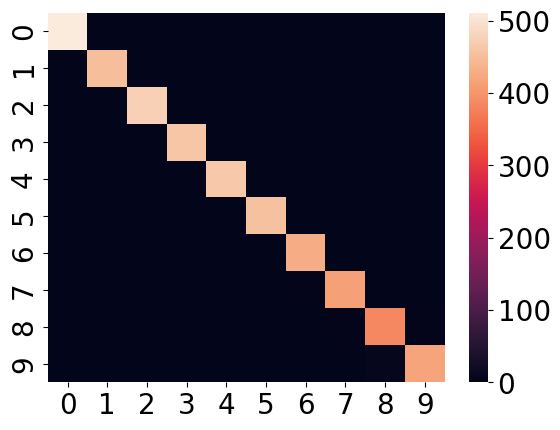

In [ ]:
sns.heatmap(conf_matrix)

# Scratch CNN without Leakage

## Data Preprocessing

### Loading Data

In [ ]:
# Loading the train data and label from the folders along with drivers details
train_image = []
image_label = []


for i in range(10):
    print('now we are in the folder C',i)
    directory_path = os.path.join(abspath_curr, "imgs", "train", "c" + str(i))
    files = os.listdir(directory_path)
    for file_name in files:
        img_name = os.path.join(directory_path, file_name)
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        label = i
        driver = driver_imgs_list[driver_imgs_list['img'] == file_name]['subject'].values[0]
        train_image.append([img,label,driver])
        image_label.append(i)

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [ ]:
# Get the number of classes
n_classes = 10

### Data Analysis

Creating json for the classes in target

In [ ]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

Displaying sample image

Train image

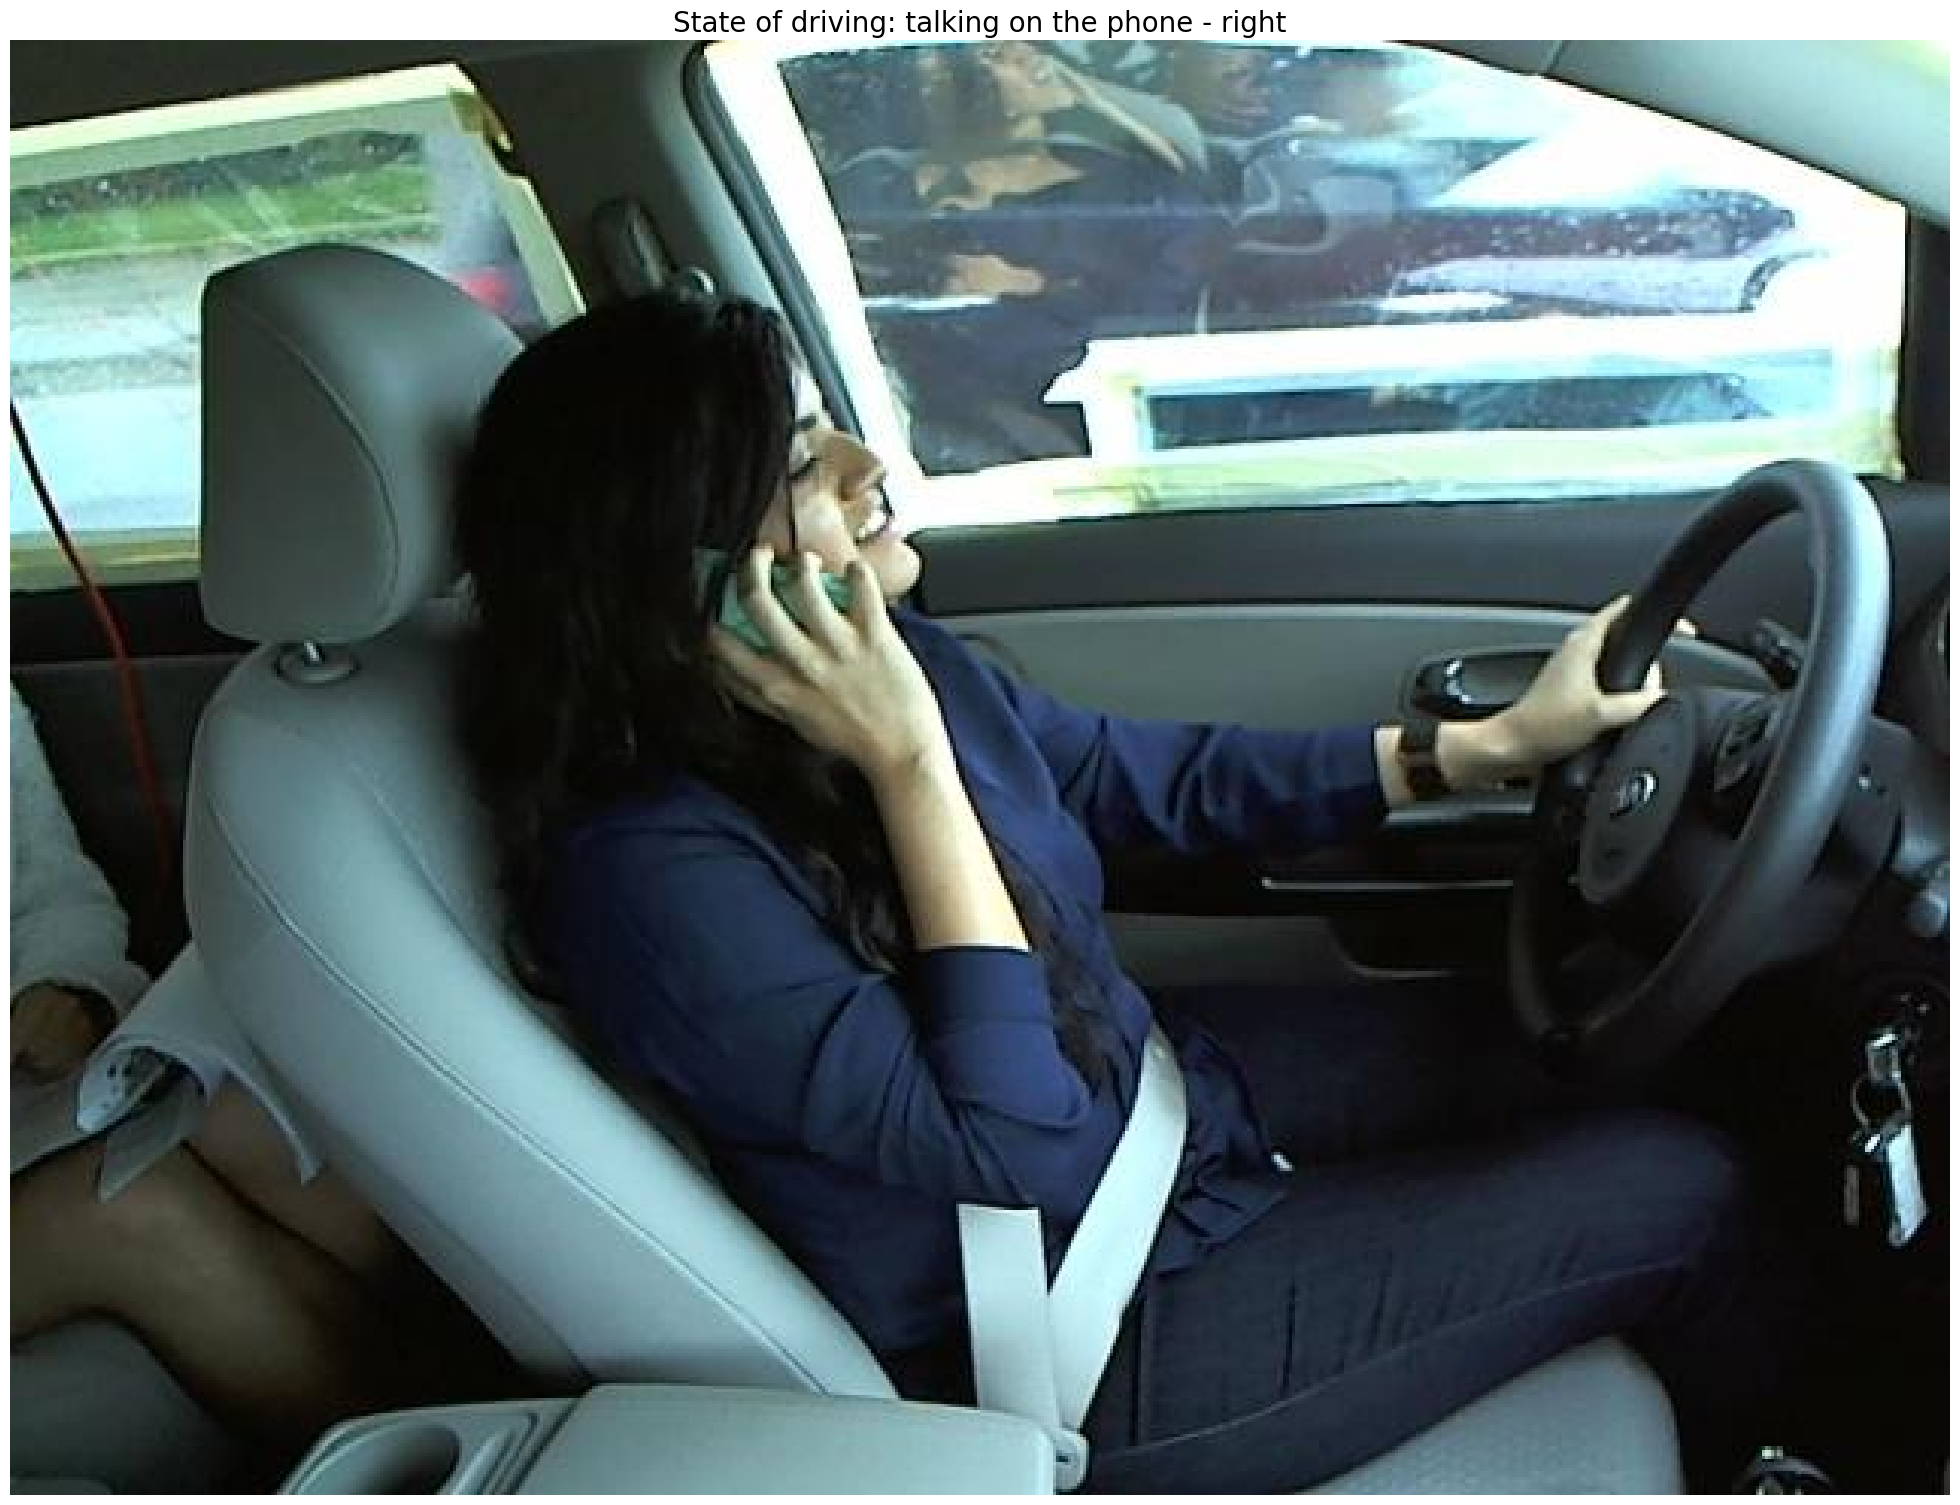

In [ ]:

fig = plt.figure(figsize=(20, 18))
train_imgs = os.path.join(abspath_curr, "imgs", "train")
pic_idx = random.randint(0, driver_imgs_list.shape[0])
im = Image.open(os.path.join(train_imgs,
                    str(driver_imgs_list.loc[pic_idx, 'classname']) +'/'
                    +str(driver_imgs_list.loc[pic_idx, 'img' ])))
plt.imshow(im)
plt.title('State of driving: ' + class_def[(driver_imgs_list.loc[pic_idx, 'classname'])])
plt.axis('off')
plt.tight_layout()
plt.show()

Test image

In [ ]:
fig = plt.figure(figsize=(20, 18))
test_imgs = os.path.join(abspath_curr, "imgs", "test")
im = Image.open(os.path.join(test_imgs, 'img_1.jpg'))
plt.imshow(im)
plt.tight_layout()
plt.show()

In [ ]:
# getting sizze of each image
im = Image.open("./imgs/train/c7/img_100702.jpg")
w, h = im.size
print(w, h)

640 480


Size of the image = 640, 480

Total number of training data : 21434


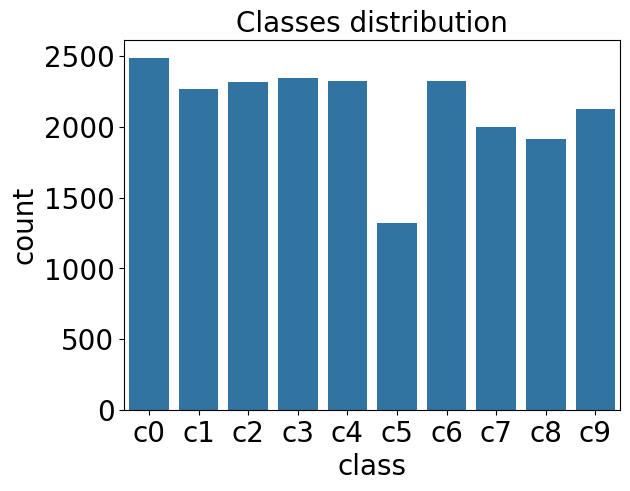

In [ ]:
# Dispalying the classes distribution of the train dataset
d = {"img" : [], "class" : []}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(train_imgs,c)) if not img.startswith(".")]
    for img in imgs:
        d["img"].append(img)
        d["class"].append(c)
df = pd.DataFrame(d)
ax = sns.countplot(data=df,x="class")
ax.set(title="Classes distribution")
print("Total number of training data :",len(df))

In [ ]:
import plotly.express as px

# Dispalying the drivers distribution of the train dataset
drivers = pd.DataFrame((driver_imgs_list['subject'].value_counts()).reset_index())
drivers.columns = ['driver_id', 'Counts']
px.histogram(drivers, x="driver_id", y='Counts', color="driver_id", title="Number of images by drivers")

In [ ]:
## Randomly shuffling the images
random.shuffle(train_image)

In [ ]:
## getting list of driver names

D = []
for features,labels,drivers in train_image:
    D.append(drivers)

## Deduplicating drivers

deduped = []

for i in D:
    if i not in deduped:
        deduped.append(i)


## selecting random drivers for the validation set
driv_selected = []
import random
driv_nums = random.sample(range(len(deduped)), 4)
for i in driv_nums:
    driv_selected.append(deduped[i])

### Splitting training and validation

Splitting training and validation set according to the drivers

In [ ]:
## Splitting the train and test according to drivers

X_train= []
y_train = []
X_val = []
y_val = []
D_train = []
D_val = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_val.append(features)
        y_val.append(labels)
        D_val.append(drivers)

    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)

print (len(X_train),len(X_val))
print (len(y_train),len(y_val))

17754 3680
17754 3680


### Encoding target and resize image

In [ ]:
## Converting images to nparray. Encoding the Y

X_train = np.array(X_train).reshape(-1,224,224,3)
X_val= np.array(X_val).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


print (X_train.shape)

(17754, 224, 224, 3)


The images are resized to a square images i.e. 224 x 224 pixels.

## Training

### Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Building the architecture of the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

model_cnn = Sequential()

model_cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(Dropout(0.3))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model_cnn.add(BatchNormalization())


model_cnn.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model_cnn.add(BatchNormalization())


model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten())

model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                      

### Compiling the model

In [ ]:
# Compile the model
sgd = SGD(learning_rate=0.001)
model_cnn.compile(optimizer= sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model_cnn.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
571/571 ━━━━━━━━━━━━━━━━━━━━ 1475s 3s/step - accuracy: 0.7226 - loss: 0.9126 - val_accuracy: 0.2967 - val_loss: 2.1600
Epoch 2/5
571/571 ━━━━━━━━━━━━━━━━━━━━ 1339s 2s/step - accuracy: 0.9900 - loss: 0.0559 - val_accuracy: 0.3349 - val_loss: 2.0694
Epoch 3/5
571/571 ━━━━━━━━━━━━━━━━━━━━ 1362s 2s/step - accuracy: 0.9971 - loss: 0.0236 - val_accuracy: 0.3536 - val_loss: 2.0372
Epoch 4/5
571/571 ━━━━━━━━━━━━━━━━━━━━ 4526s 8s/step - accuracy: 0.9988 - loss: 0.0143 - val_accuracy: 0.3648 - val_loss: 2.0378
Epoch 5/5
571/571 ━━━━━━━━━━━━━━━━━━━━ 1425s 2s/step - accuracy: 0.9998 - loss: 0.0096 - val_accuracy: 0.3694 - val_loss: 2.0458


## Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
import os
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

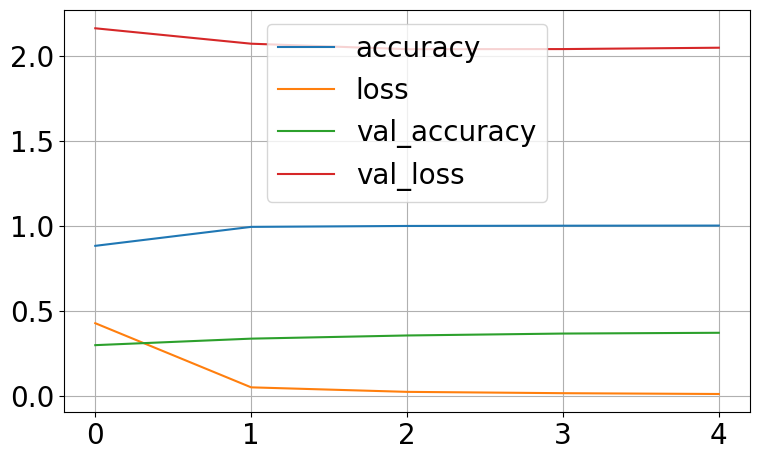

In [ ]:

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_Scratch_withoutleakage.pdf')
plt.show()

In [ ]:
y_pred = model_cnn.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

131/131 ━━━━━━━━━━━━━━━━━━━━ 55s 415ms/step
Confusion Matrix:
[[130   0   0  82  50  16   1   9  40  95]
 [ 24 138   0  11   0   3   6  30 172  52]
 [  0  18  26   2  15   0  89  39 187  48]
 [  8   0   0 266  74  42   0   0  14  33]
 [  9   1   0  11 119  33   1   7 105 159]
 [ 17   0   0  12  48 155   0   1 183  32]
 [  5   6   0   1   1   0 149   6 179  90]
 [  1   6   1  12   9   0   1 217  70  42]
 [ 11  14  13  16   9   2   5  86 156  53]
 [ 42   1   1  70  50  26   1   3  24 188]]


<Axes: >

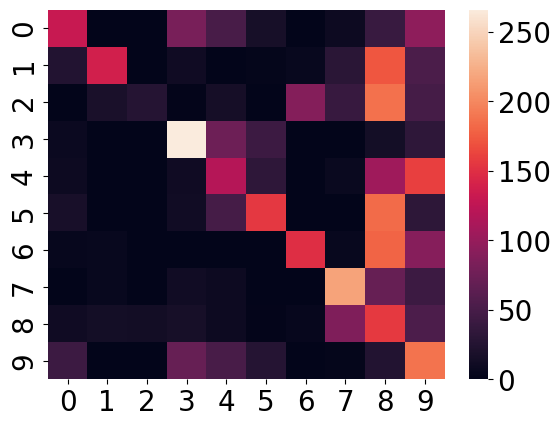

In [ ]:
sns.heatmap(conf_matrix)

### Evaluate the CNN Model

In [ ]:
# Evaluate the CNN model
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_val,y_val)
print("Test Loss:", test_loss_cnn)
print("Test Accuracy:", test_accuracy_cnn)


# ResNet50 Model

In [ ]:
driv_selected = ['p050', 'p015', 'p022', 'p056']

In [ ]:
## Splitting the train and validation according to drivers

X_train= []
y_train = []
X_val = []
y_val = []
D_train = []
D_val = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_val.append(features)
        y_val.append(labels)
        D_val.append(drivers)

    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)

print (len(X_train),len(X_val))
print (len(y_train),len(y_val))

17919 3515
17919 3515


### Encoding target and resize image

In [ ]:
## Converting images to nparray. Encoding the Y

X_train = np.array(X_train).reshape(-1,224,224,3)
X_val = np.array(X_val).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


print (X_train.shape)


(17919, 224, 224, 3)


The images are resized to a square images i.e. 224 x 224 pixels.

## Training

### Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Building the architecture of the model

In [ ]:
## Defining the input

from keras.layers import Input
resnet50_input = Input(shape = (224, 224, 3), name = 'Image_input')

## The RESNET model

from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50


#Get the RESNET weights and layers

model_resnet50_conv = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))
model_resnet50_conv.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

This code segment defines the input layer for the ResNet50 model by creating an Input tensor with shape (224, 224, 3) representing image dimensions.

Then, it imports the ResNet50 model from Keras applications, specifying to load pre-trained weights from the ImageNet dataset and excluding the top classification layer.

The model_resnet50_conv variable holds the ResNet50 model without the top layers, and the summary() method prints a summary of the model architecture.

In [ ]:
#Use the generated model
from keras.models import Model
import math


output_resnet50_conv = model_resnet50_conv(resnet50_input)

#Add the fully-connected layers

x = Flatten(name='flatten')(output_resnet50_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)


model_resnet50 = Model(inputs = resnet50_input, outputs = x)
# for layer in model_resnet50.layers[:2]:
#     layer.trainable=False
# for layer in model_resnet50.layers[2:]:
#     layer.trainable=True


model_resnet50.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 predictions (Dense)         (None, 10)                1003530   
                                                                 
Total params: 24591242 (93.81 MB)
Trainable params: 24538122 (93.61 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


This code snippet utilizes the generated ResNet50 model (model_resnet50_conv) by adding fully connected layers for classification.

The output of the pre-trained ResNet50 model is connected to a flattening layer (Flatten) to transform the feature maps into a 1D vector. Then, a fully connected layer with softmax activation is added to produce class probabilities.

The resulting model (model_resnet50) is constructed using the input and output layers defined, and its architecture is summarized using the summary() method.

### Compiling the model

In [ ]:
# Compile CNN model
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,
        math.floor((1+epoch)/epochs_drop))
    return lrate
lrate = LearningRateScheduler(step_decay)

sgd = optimizers.SGD(learning_rate= 0.001)


model_resnet50.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])


This code block compiles the ResNet50 model (model_resnet50) using stochastic gradient descent (SGD) optimizer with a learning rate of 0.001.

Additionally, a learning rate scheduler step_decay is defined to dynamically adjust the learning rate during training. It gradually reduces the learning rate by half every 10 epochs.

The loss function is specified as categorical crossentropy, suitable for multiclass classification tasks, and accuracy is chosen as the evaluation metric.







### Training the model

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('resnet_weights_aug_alltrained_sgd2_setval.hdf5..weights.h5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopper = EarlyStopping(monitor='accuracy', patience=7, verbose=1)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)


This code snippet sets up data augmentation using the ImageDataGenerator class from Keras. It specifies various transformations such as height and width shifts, zooming, and rotation for image augmentation.

Two callbacks, ModelCheckpoint and EarlyStopping, are defined for saving the best model weights during training and stopping training early based on the accuracy metric, respectively.

Finally, an image data generator datagen is created with the specified augmentation parameters and initialized with training data X_train and y_train, with a batch size of 64.

In [ ]:
# Fits the model on batches with real-time data augmentation:
resnet50_model = model_resnet50.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper,lrate],
                                                            epochs = 40, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/40
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2341 - loss: 3.2772 
Epoch 1: val_loss improved from inf to 1.67815, saving model to resnet_weights_aug_alltrained_sgd2_setval.hdf5..weights.h5
292/292 ━━━━━━━━━━━━━━━━━━━━ 4180s 14s/step - accuracy: 0.2345 - loss: 3.2749 - val_accuracy: 0.5542 - val_loss: 1.6782 - learning_rate: 0.0010
Epoch 2/40
  1/292 ━━━━━━━━━━━━━━━━━━━━ 1:07:48 14s/step - accuracy: 0.5000 - loss: 1.7874
Epoch 2: val_loss improved from 1.67815 to 1.28409, saving model to resnet_weights_aug_alltrained_sgd2_setval.hdf5..weights.h5
292/292 ━━━━━━━━━━━━━━━━━━━━ 178s 563ms/step - accuracy: 0.5000 - loss: 0.8968 - val_accuracy: 0.6514 - val_loss: 1.2841 - learning_rate: 0.0010
Epoch 3/40
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.5671 - loss: 1.5298 
Epoch 3: val_loss improved from 1.28409 to 1.07506, saving model to resnet_weights_aug_alltrained_sgd2_setval.hdf5..weights.h5
292/292 ━━━━━━━━━━━━━━━━━━━━ 4375s 15s/step - accuracy: 0.5672 - loss

## Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
import os
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

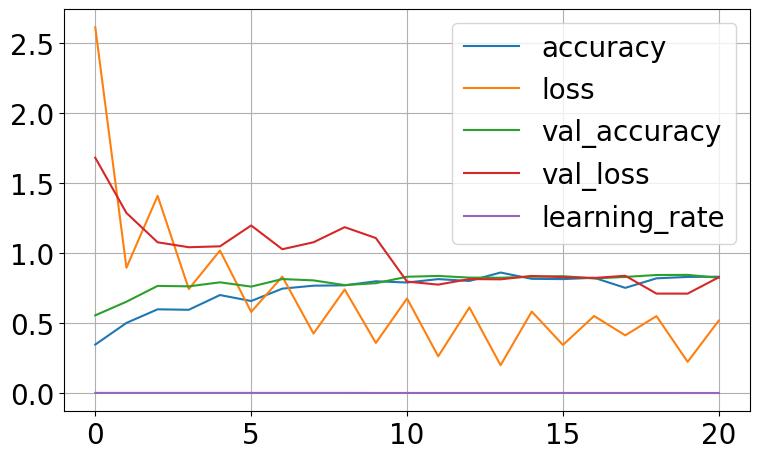

In [ ]:

# Create a figure
pd.DataFrame(resnet50_model.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_ResNet50.pdf')
plt.show()

In [ ]:
y_pred = model_resnet50.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

116/116 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step
Confusion Matrix:
[[355   7   0   0   2   1   0   0  33  14]
 [  1 284   0   5   0   0   2   0  47   0]
 [  0   0 286   0   0   0   0   0  62   0]
 [  4   1   0 387   1   0   0   0   5   1]
 [  4   0   0   1 300   6   0  16  67   2]
 [  3   2   0   0   1 375   0   1  12   9]
 [  0   1   0   0   0   0 317   2  72   0]
 [  2   0   0   0   0   5   0 286   3  38]
 [  5   0   6   0   3   1  14  52 237  14]
 [ 47   4   0   0   1  31   0   2  44 208]]


<Axes: >

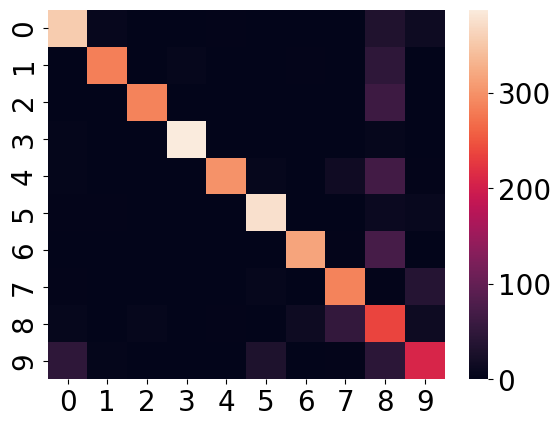

In [ ]:
sns.heatmap(conf_matrix)

# MobileNet Model

## Training

### Building the architecture of the model

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model.summary()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Model

x=base_model.output
x=GlobalAveragePooling2D()(x)

# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

# x = Dropout(0.1)(x) # ****reduce dropout

# x=Dense(1024,activation='relu')(x) #dense layer 2

# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# x=Dense(512,activation='relu')(x) #dense layer 3

preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

model_mobilenet = Model(inputs=base_model.input, outputs=preds)

model_mobilenet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 32)    128   

This code snippet defines the top layers of a MobileNet model. It takes the output of the base MobileNet model (base_model) and adds a GlobalAveragePooling2D layer to reduce spatial dimensions. Then, a Dense layer with softmax activation is appended to produce class probabilities.

The resulting model (model_mobilenet) is constructed using the input and output layers defined, and its architecture is summarized using the summary() method.

### Compiling the model

In [ ]:
from keras import optimizers

#adam = optimizers.Adam(lr=0.001) #tried 0.0005 - too slow and didn't converge
sgd = optimizers.SGD(learning_rate= 0.005) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model_mobilenet.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy']) # create object


This code segment imports the optimizers module from Keras and defines a stochastic gradient descent (SGD) optimizer with a learning rate of 0.005.

Then, it compiles a MobileNet model (model_mobilenet) using the specified SGD optimizer. The loss function is set to categorical crossentropy, suitable for multiclass classification tasks, and accuracy is chosen as the evaluation metric.







### Training the model

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('mobilenet_sgd_nolayers.hdf5.keras.weights.h5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopper = EarlyStopping(monitor='accuracy', patience=7, verbose=1)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)




This code block sets up data augmentation using the ImageDataGenerator class from Keras. It defines various transformations such as height and width shifts, zooming, and rotation for image augmentation.

Two callbacks, ModelCheckpoint and EarlyStopping, are defined for saving the best model weights during training and stopping training early based on the accuracy metric, respectively.

Finally, an image data generator datagen is created with the specified augmentation parameters and initialized with training data X_train and y_train, with a batch size of 64.







In [ ]:
# Fits the model on batches with real-time data augmentation:
mobilenet_model = model_mobilenet.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper],
                                                            epochs = 25, verbose = 1, validation_data = (X_test, y_test))



Epoch 1/25
293/292 [==============================] - 182s 620ms/step - loss: 1.8309 - accuracy: 0.3781 - val_loss: 1.0645 - val_accuracy: 0.6579

Epoch 00001: val_loss improved from inf to 1.06453, saving model to mobilenet_sgd_nolayers.hdf5
Epoch 2/25
293/292 [==============================] - 174s 595ms/step - loss: 1.0360 - accuracy: 0.6666 - val_loss: 0.6174 - val_accuracy: 0.7906

Epoch 00002: val_loss improved from 1.06453 to 0.61739, saving model to mobilenet_sgd_nolayers.hdf5
Epoch 3/25
293/292 [==============================] - 173s 591ms/step - loss: 0.7862 - accuracy: 0.7451 - val_loss: 0.5379 - val_accuracy: 0.8069

Epoch 00003: val_loss improved from 0.61739 to 0.53792, saving model to mobilenet_sgd_nolayers.hdf5
Epoch 4/25
293/292 [==============================] - 171s 585ms/step - loss: 0.6663 - accuracy: 0.7809 - val_loss: 0.4837 - val_accuracy: 0.8245

Epoch 00004: val_loss improved from 0.53792 to 0.48371, saving model to mobilenet_sgd_nolayers.hdf5
Epoch 5/25
293/

## Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
import os
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

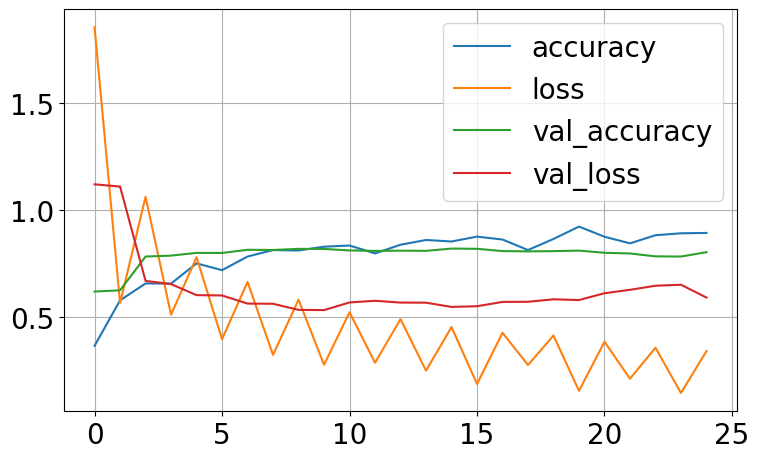

In [ ]:

model_mobilenet.load_weights("mobilenet_sgd_nolayers.hdf5.keras.weights.h5")
# Create a figure
pd.DataFrame(mobilenet_model.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_MobileNet.pdf')
plt.show()

In [ ]:
y_pred = model_mobilenet.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

116/116 ━━━━━━━━━━━━━━━━━━━━ 66s 560ms/step
Confusion Matrix:
[[273   0   2  19   7   9   0   0   6  96]
 [ 17 292   0   1   0   1  12   4   0  12]
 [  0   0 342   0   0   0   0   0   6   0]
 [  1   0   0 389   3   1   0   0   4   1]
 [ 13   0   0   0 284  15   2   3  43  36]
 [  4   0   0   8   0 389   0   0   1   1]
 [ 19   0   8   0   0   0 319   0  40   6]
 [  1   0   1   0   0   4   0 297  24   7]
 [ 20   0  17   0   1   0  45  73 173   3]
 [ 31   0   0  14   1  13   1   2  14 261]]


<Axes: >

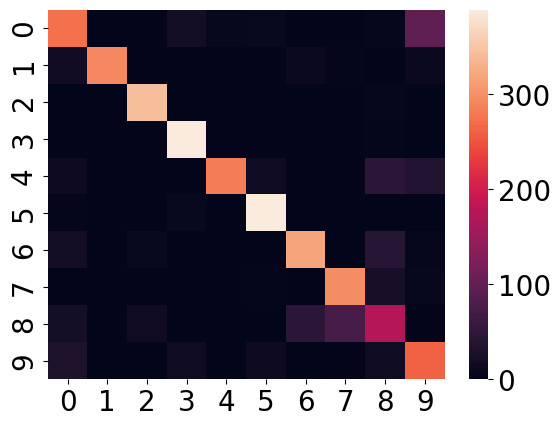

In [ ]:
sns.heatmap(conf_matrix)

# VGG16 Model

## Training

### Building the architecture of the model

In [ ]:
## Defining the input

from keras.layers import Input
vgg16_input = Input(shape = (224, 224, 3), name = 'Image_input')


## The VGG model

from keras.applications.vgg16 import VGG16, preprocess_input

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_tensor = vgg16_input)
model_vgg16_conv.summary()

This code segment defines the input layer for the VGG16 model by creating an Input tensor with shape (224, 224, 3) representing image dimensions.

Then, it imports the VGG16 model from Keras applications, specifying to load pre-trained weights from the ImageNet dataset and excluding the top classification layer.

The model_vgg16_conv variable holds the VGG16 model without the top layers, and the summary() method prints a summary of the model architecture.

In [ ]:
#Use the generated model
from keras.models import Model

output_vgg16_conv = model_vgg16_conv(vgg16_input)

#Add the fully-connected layers

x = Flatten(name='flatten')(output_vgg16_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

model_vgg16 = Model(inputs = vgg16_input, outputs = x)
model_vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

### Compiling the model

In [ ]:
from keras import optimizers

#adam = optimizers.Adam(lr=0.001) #tried 0.0005 - too slow and didn't converge
sgd = optimizers.SGD(learning_rate= 0.001) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model_vgg16.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy']) # create object


This code block imports the optimizers module from Keras and defines a stochastic gradient descent (SGD) optimizer with a learning rate of 0.001.Then, it compiles a VGG16 model (model_vgg16) using the specified SGD optimizer. The loss function is set to categorical crossentropy, suitable for multiclass classification tasks, and accuracy is chosen as the evaluation metric.







### Training the model

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('vgg_weights_aug_setval_sgd.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)




This code snippet sets up data augmentation using the ImageDataGenerator class from Keras. It defines various transformations such as height and width shifts, zooming, and rotation for image augmentation.

Two callbacks, ModelCheckpoint and EarlyStopping, are defined for saving the best model weights during training and stopping training early based on validation loss, respectively.

Finally, an image data generator datagen is created with the specified augmentation parameters and initialized with training data X_train and y_train, with a batch size of 64.

In [ ]:
# Fits the model on batches with real-time data augmentation:
vgg16_model = model_vgg16.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper],
                                                            epochs = 25, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/25
293/292 [==============================] - 215s 734ms/step - loss: 2.3832 - accuracy: 0.1137 - val_loss: 2.3033 - val_accuracy: 0.0872

Epoch 00001: val_loss improved from inf to 2.30333, saving model to vgg_weights_aug_setval_sgd.hdf5
Epoch 2/25
293/292 [==============================] - 206s 702ms/step - loss: 2.2740 - accuracy: 0.1391 - val_loss: 2.2570 - val_accuracy: 0.1498

Epoch 00002: val_loss improved from 2.30333 to 2.25698, saving model to vgg_weights_aug_setval_sgd.hdf5
Epoch 3/25
293/292 [==============================] - 205s 699ms/step - loss: 2.1903 - accuracy: 0.1935 - val_loss: 1.9542 - val_accuracy: 0.2912

Epoch 00003: val_loss improved from 2.25698 to 1.95418, saving model to vgg_weights_aug_setval_sgd.hdf5
Epoch 4/25
293/292 [==============================] - 205s 700ms/step - loss: 2.0056 - accuracy: 0.2704 - val_loss: 1.5515 - val_accuracy: 0.4114

Epoch 00004: val_loss improved from 1.95418 to 1.55149, saving model to vgg_weights_aug_setval_sgd.hdf5

## Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
import os
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

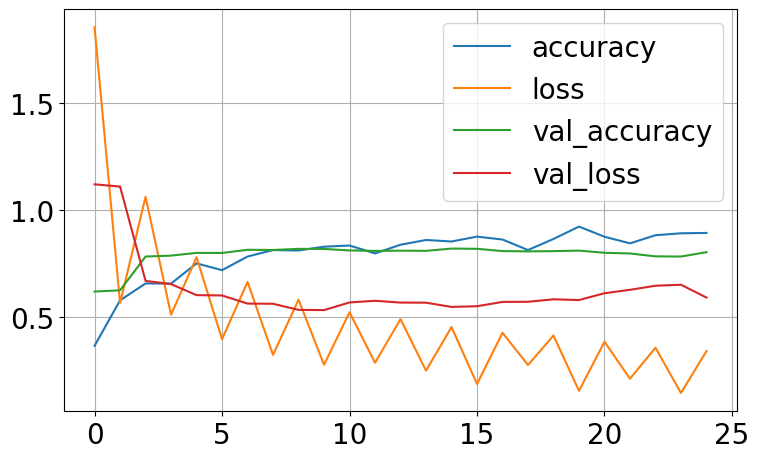

In [ ]:

model_vgg16.load_models("vgg_weights_aug_setval_sgd.hdf5")
# Create a figure
pd.DataFrame(vgg16_model.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_MobileNet.pdf')
plt.show()

In [ ]:
y_pred = model_vgg16.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

116/116 ━━━━━━━━━━━━━━━━━━━━ 66s 560ms/step
Confusion Matrix:
[[273   0   2  19   7   9   0   0   6  96]
 [ 17 292   0   1   0   1  12   4   0  12]
 [  0   0 342   0   0   0   0   0   6   0]
 [  1   0   0 389   3   1   0   0   4   1]
 [ 13   0   0   0 284  15   2   3  43  36]
 [  4   0   0   8   0 389   0   0   1   1]
 [ 19   0   8   0   0   0 319   0  40   6]
 [  1   0   1   0   0   4   0 297  24   7]
 [ 20   0  17   0   1   0  45  73 173   3]
 [ 31   0   0  14   1  13   1   2  14 261]]


<Axes: >

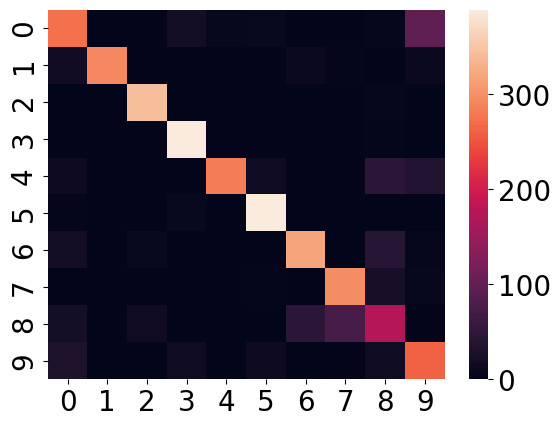

In [ ]:
sns.heatmap(conf_matrix)

# Xception Model

## Training

### Building the architecture of the model

In [ ]:
## Defining the input

from keras.layers import Input
xception_input = Input(shape = (224, 224, 3), name = 'Image_input')

## The Xception model

from keras.applications.xception import preprocess_input, decode_predictions
from keras.applications.xception import Xception


model_xception_conv = Xception(weights= 'imagenet', include_top=False, input_shape= (224,224,3))
#model_xception_conv.summary()



This code segment defines the input layer for the Xception model by creating an Input tensor with shape (224, 224, 3) representing image dimensions.

Then, it imports the Xception model from Keras applications, specifying to load pre-trained weights from ImageNet dataset and excluding the top classification layer.

The model_xception_conv variable holds the Xception model without the top layers.

In [ ]:
#Use the generated model
from keras.models import Model
import math

output_xception_conv = model_xception_conv(xception_input)

#Add the fully-connected layers

x = Flatten(name='flatten')(output_xception_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)


model_xception = Model(inputs = xception_input, outputs = x)
# for layer in resnet50_pretrained.layers[:2]:
#     layer.trainable=False
# for layer in resnet50_pretrained.layers[2:]:
#     layer.trainable=True


model_xception.summary()

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,
        math.floor((1+epoch)/epochs_drop))
    return lrate
lrate = LearningRateScheduler(step_decay)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Image_input (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │     1,003,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,865,010 (83.41 MB)

 Trainable params: 21,810,482 (83.20 MB)

 Non-trainable params: 54,528 (213.00 KB)

This code segment extends a pre-trained Xception model (model_xception_conv) by adding fully connected layers for classification. It then summarizes the model architecture and defines a learning rate scheduler step_decay to adjust the learning rate during training.

### Compiling the model

In [ ]:
# Compile CNN model
#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)
sgd = optimizers.SGD(learning_rate = 0.001)
model_xception.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])


This code block compiles the CNN model (model_xception) using stochastic gradient descent (SGD) optimizer with a learning rate of 0.001. The loss function is specified as categorical crossentropy, suitable for multiclass classification tasks, and the model is configured to monitor accuracy as the evaluation metric.

### Training the model

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('xception_weights_aug_alltrained_setval_sgd3.hdf5.keras', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)

This code snippet sets up data augmentation using the ImageDataGenerator class from TensorFlow/Keras. It specifies various transformations such as height and width shifts, zooming, and rotation for image augmentation. Two callbacks, ModelCheckpoint and EarlyStopping, are defined for model saving and early stopping based on validation loss, respectively. Finally, an image data generator is created using the specified augmentation parameters and initialized with training data X_train and y_train, with a batch size of 64.

In [ ]:
# Fits the model on batches with real-time data augmentation:
xception_model = model_xception.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper, lrate],
                                                            epochs = 25, verbose = 1, validation_data = (X_val, y_val))



Epoch 1/25
293/292 [==============================] - 249s 851ms/step - loss: 2.2134 - accuracy: 0.1936 - val_loss: 1.9337 - val_accuracy: 0.3475

Epoch 00001: val_loss improved from inf to 1.93373, saving model to xception_weights_aug_alltrained_setval_sgd3.hdf5
Epoch 2/25
293/292 [==============================] - 242s 824ms/step - loss: 1.9692 - accuracy: 0.3076 - val_loss: 1.7060 - val_accuracy: 0.4339

Epoch 00002: val_loss improved from 1.93373 to 1.70605, saving model to xception_weights_aug_alltrained_setval_sgd3.hdf5
Epoch 3/25
293/292 [==============================] - 241s 824ms/step - loss: 1.7542 - accuracy: 0.3954 - val_loss: 1.5214 - val_accuracy: 0.4686

Epoch 00003: val_loss improved from 1.70605 to 1.52141, saving model to xception_weights_aug_alltrained_setval_sgd3.hdf5
Epoch 4/25
293/292 [==============================] - 241s 824ms/step - loss: 1.5828 - accuracy: 0.4561 - val_loss: 1.3126 - val_accuracy: 0.5620

Epoch 00004: val_loss improved from 1.52141 to 1.312

In [ ]:
# Fits the model on batches with real-time data augmentation:
xception_model = model_xception.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper, lrate],
                                                            epochs = 10, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/10
293/292 [==============================] - 242s 826ms/step - loss: 0.5773 - accuracy: 0.8042 - val_loss: 0.5807 - val_accuracy: 0.8172

Epoch 00001: val_loss improved from 0.58162 to 0.58072, saving model to xception_weights_aug_alltrained_setval_sgd3.hdf5
Epoch 2/10
293/292 [==============================] - 241s 824ms/step - loss: 0.5602 - accuracy: 0.8094 - val_loss: 0.5794 - val_accuracy: 0.8231

Epoch 00002: val_loss improved from 0.58072 to 0.57939, saving model to xception_weights_aug_alltrained_setval_sgd3.hdf5
Epoch 3/10
293/292 [==============================] - 241s 824ms/step - loss: 0.5544 - accuracy: 0.8114 - val_loss: 0.5800 - val_accuracy: 0.8191

Epoch 00003: val_loss did not improve from 0.57939
Epoch 4/10
293/292 [==============================] - 242s 825ms/step - loss: 0.5331 - accuracy: 0.8211 - val_loss: 0.6055 - val_accuracy: 0.8142

Epoch 00004: val_loss did not improve from 0.57939
Epoch 5/10
293/292 [==============================] - 241s 824ms/ste

In [ ]:
# Fits the model on batches with real-time data augmentation:
xception_model = model_xception.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper, lrate],
                                                            epochs = 10, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/10
293/292 [==============================] - 242s 827ms/step - loss: 0.4771 - accuracy: 0.8421 - val_loss: 0.5967 - val_accuracy: 0.8242

Epoch 00001: val_loss did not improve from 0.56783
Epoch 2/10
293/292 [==============================] - 241s 824ms/step - loss: 0.4666 - accuracy: 0.8431 - val_loss: 0.5516 - val_accuracy: 0.8283

Epoch 00002: val_loss improved from 0.56783 to 0.55156, saving model to xception_weights_aug_alltrained_setval_sgd3.hdf5
Epoch 3/10
293/292 [==============================] - 242s 825ms/step - loss: 0.4519 - accuracy: 0.8480 - val_loss: 0.5783 - val_accuracy: 0.8250

Epoch 00003: val_loss did not improve from 0.55156
Epoch 4/10
293/292 [==============================] - 242s 824ms/step - loss: 0.4611 - accuracy: 0.8461 - val_loss: 0.5590 - val_accuracy: 0.8369

Epoch 00004: val_loss did not improve from 0.55156
Epoch 5/10
293/292 [==============================] - 242s 825ms/step - loss: 0.4563 - accuracy: 0.8443 - val_loss: 0.5875 - val_accuracy:

## Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
import os
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

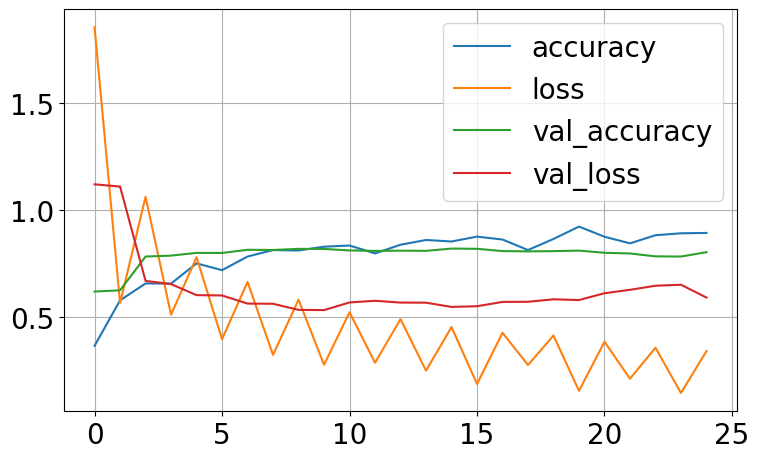

In [ ]:

model_xception.load_model("xception_weights_aug_alltrained_setval_sgd3.hdf5.keras")
# Create a figure
pd.DataFrame(xception_model.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_Xception.pdf')
plt.show()

In [ ]:
y_pred = model_xception.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

116/116 ━━━━━━━━━━━━━━━━━━━━ 66s 560ms/step
Confusion Matrix:
[[273   0   2  19   7   9   0   0   6  96]
 [ 17 292   0   1   0   1  12   4   0  12]
 [  0   0 342   0   0   0   0   0   6   0]
 [  1   0   0 389   3   1   0   0   4   1]
 [ 13   0   0   0 284  15   2   3  43  36]
 [  4   0   0   8   0 389   0   0   1   1]
 [ 19   0   8   0   0   0 319   0  40   6]
 [  1   0   1   0   0   4   0 297  24   7]
 [ 20   0  17   0   1   0  45  73 173   3]
 [ 31   0   0  14   1  13   1   2  14 261]]


This code snippet predicts the classes for validation data using a pre-trained Xception model (model_xception). It then converts the predicted probabilities to class labels by selecting the index of the maximum probability for each prediction. The true class labels for the validation data are similarly extracted. Finally, it computes the confusion matrix using the predicted and true class labels and prints the result.

<Axes: >

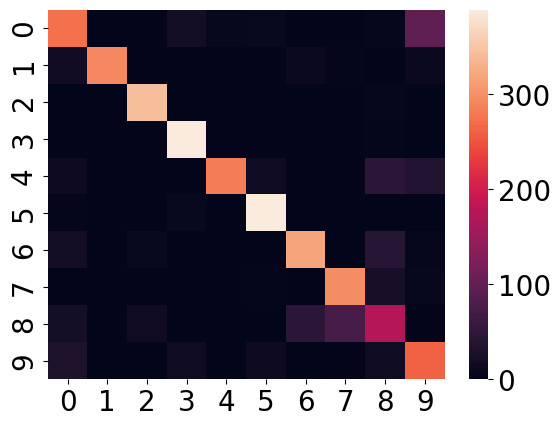

In [ ]:
sns.heatmap(conf_matrix)

# About results

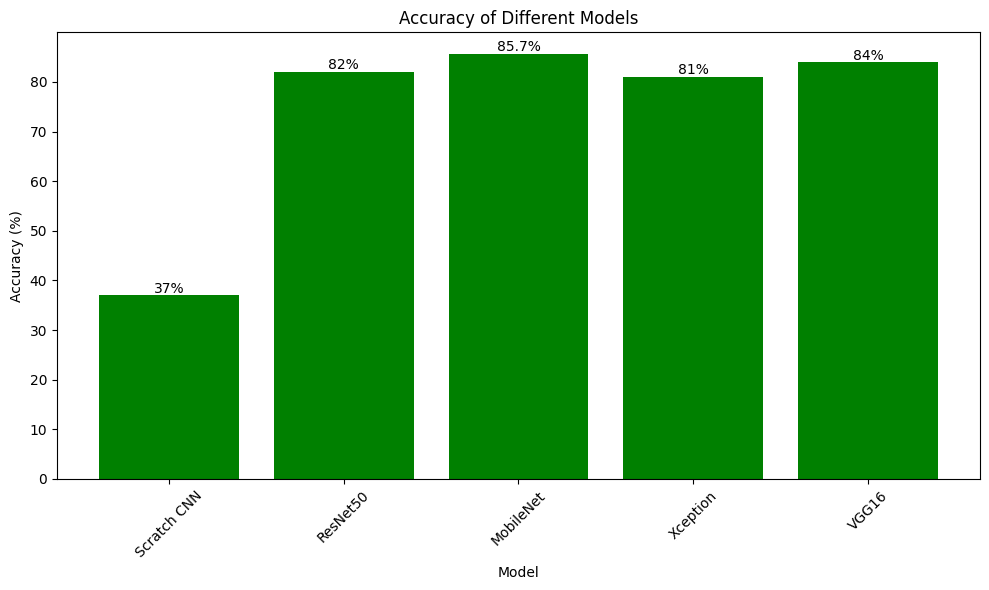

In [19]:
import matplotlib.pyplot as plt

# Define models and their corresponding accuracies
models = ['Scratch CNN', 'ResNet50', 'MobileNet', 'Xception', 'VGG16']
accuracies = [37, 82, 85.7, 81, 84]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='green')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')

# Add data labels
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f'{acc}%', ha='center')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



| Model                      | Validation Accuracy | Validation Loss |
|----------------------------|---------------------|-----------------|
| Scratch CNN with leakage   | 99%                 | 0.02            |
| Scratch CNN without leakage| 37%                 | 2.04            |
| Resnet50                   | 82%                 | 0.53            |
| MobileNet                  | 85.7%               | 0.4             |
| Xception                   | 81%                 | 0.55            |
| VGG16                      | 84%                 | 0.5             |
 


The Scratch CNN model demonstrated impressive performance, achieving 99% accuracy on both the training and validation datasets. However, it failed to provide the same accuracy in the test data.

This discrepancy arises from a critical factor:

* the presence of drivers in the training set who also appear in the validation set. Conversely, the test set exclusively comprises new drivers. This introduces a form of data leakage, wherein the model becomes adept at predicting outcomes based on familiar drivers encountered during training.

To mitigate this issue, rather than employing random splits, a more discerning approach involves partitioning the data based on drivers. Specifically, ensuring that drivers present in the training set are absent from the validation set, thereby fostering a more rigorous training environment for the model to generalize effectively.

Without leakage, the Scratch CNN model's accuracy dropped drastically to 35%.

Utilizing transfer learning with pre-trained models:

Image augmentation is employed to mitigate overfitting, ensuring robustness in model training.

Training involves fine-tuning pre-trained models, exclusively training newly added layers while retaining pre-existing weights from the ImageNet dataset.

Among various optimizers, like Adam, RMSprop, SGD. SGD gave better results compared to other optimizers.

Model performances:
* Scratch CNN - 37%
* Resnet50, with SGD optimizer - 82%
* MobileNet, with SGD optimizer - 85.7%
* VGG16, with SGD optimizer - 81%
* Xception, with SGD optimizer - 84%

When we compare the accuracies and loss of all the models we can say that the Mobilenet has good performance among all.

# Conclusion

In conclusion, the performance of the Scratch CNN model demonstrated a significant drop in accuracy when tested on unseen data due to data leakage, highlighting the importance of careful data partitioning based on drivers to prevent such issues.

Utilizing transfer learning with pre-trained models, along with image augmentation to mitigate overfitting, led to improved performance across various models. Among them, MobileNet pretrained model stood out with the highest accuracy, indicating its effectiveness in detecting distracted driving behaviors.

However, there is still room for improvement. Further enhancements can be achieved by incorporating additional layers, fine-tuning parameters, and adopting ensemble approaches with multiple pre-trained models. These strategies can enhance the learning capabilities of the models and potentially yield even better results in detecting distracted driving behaviors.

Overall, the use of advanced machine learning techniques, coupled with insights into the underlying causes of road safety problems, such as driver distraction, holds promise for improving road safety and reducing the incidence of accidents caused by distracted driving.







## References

1. https://www.kaggle.com/code/praveenmaripeti/state-farm-distracted-driver-detection-with-keras

2. https://medium.com/r/?url=https%3A%2F%2Ftowardsdatascience.com%2Ftransfer-learning-using-mobilenet-and-keras-c75daf7ff299

3. https://arxiv.org/ftp/arxiv/papers/2204/2204.03371.pdf






## Video Recording of the Presentation

https://gwu0-my.sharepoint.com/:v:/g/personal/g23280401_gwu_edu/ER4W3z81LFhDi6rfiOhdFZ0B-8PGhrxOcBheC4CkSBYY-A?e=3kmXwT

